# **TikTok Project**

In [1]:
import numpy as np
import pandas as pd
import platform
import statsmodels
print('Python version: ', platform.python_version())
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)
print('statsmodels version: ', statsmodels.__version__)

Python version:  3.12.2
numpy version:  2.2.4
pandas version:  2.2.3
statsmodels version:  0.14.4


# **Regression modeling**

**The goal** is to build a logistic regression model and evaluate the model.

# **PACE stages**

## **PACE: Plan**

In [2]:
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score

In [3]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

## **PACE: Analyze**

### **Explore data with EDA**

Let's analyze the data and check for and handle missing values and duplicates.

In [4]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
rows, cols = data.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 19382
Number of columns: 12


In [6]:
# Get basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
# Check for missing values
data.isnull().sum(axis = 0)

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
data.dropna(inplace=True)

In [10]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [11]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

Check for and handle outliers.

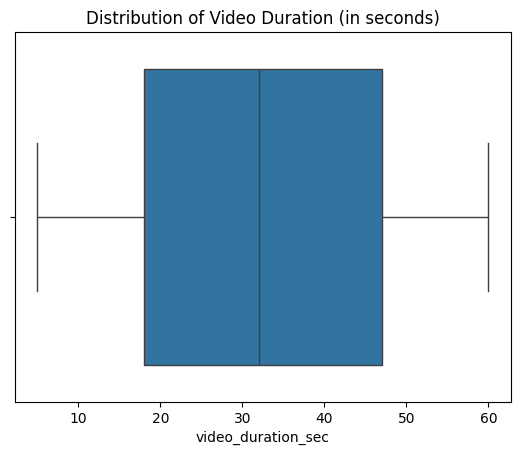

In [12]:
# Create a boxplot to visualize distribution of `video_duration_sec`
sns.boxplot(x="video_duration_sec", data=data)
plt.title("Distribution of Video Duration (in seconds)")
plt.show()

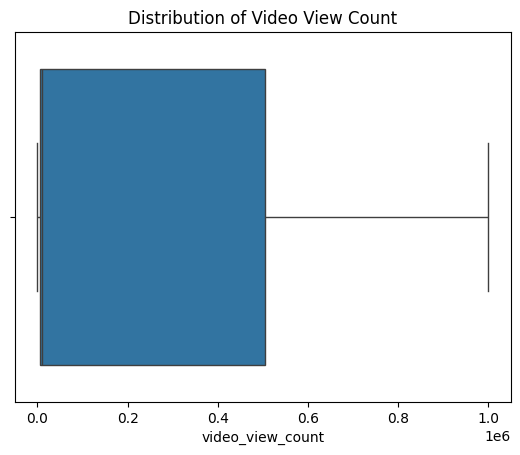

In [13]:
# Create a boxplot to visualize distribution of `video_view_count`
sns.boxplot(x="video_view_count", data=data)
plt.title("Distribution of Video View Count")
plt.show()

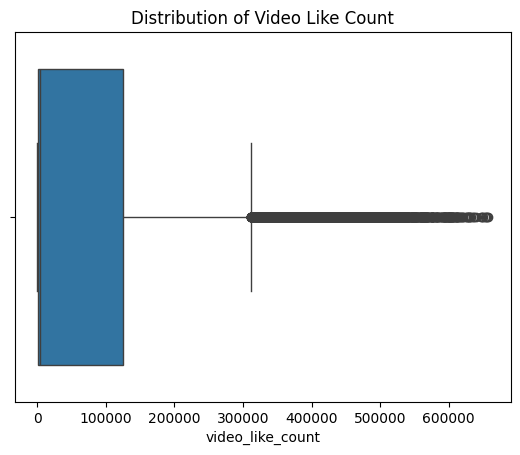

In [14]:
# Create a boxplot to visualize distribution of `video_like_count`
sns.boxplot(x="video_like_count", data=data)
plt.title("Distribution of Video Like Count")
plt.show()

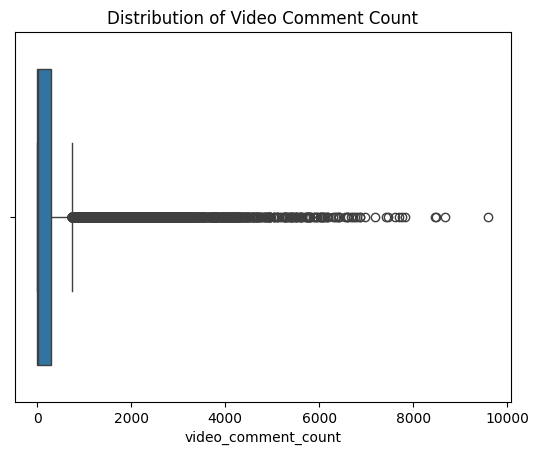

In [15]:
# Create a boxplot to visualize distribution of `video_comment_count`
sns.boxplot(x="video_comment_count", data=data)
plt.title("Distribution of Video Comment Count")
plt.show()

In [16]:
# Check for and handle outliers for video_like_count

# IQR
Q1 = np.percentile(data['video_like_count'], 25, method='midpoint')
Q3 = np.percentile(data['video_like_count'], 75, method='midpoint')
IQR = Q3 - Q1

upper_like = Q3 + 1.5*IQR 
lower_like = Q1 - 1.5*IQR 

# Above Upper bound
upper_array = np.array(data['video_like_count'] >= upper_like)
print("Upper Bound:", upper_like)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(data['video_like_count'] <= lower_like)
print("Lower Bound:", lower_like)
print(lower_array.sum())

Upper Bound: 311336.75
1726
Lower Bound: -185505.25
0


In [17]:
data.loc[data["video_like_count"] > upper_like, "video_like_count"] = upper_like

In [18]:
# Check for and handle outliers for video_comment_count

# IQR
Q1 = np.percentile(data['video_comment_count'], 25, method='midpoint')
Q3 = np.percentile(data['video_comment_count'], 75, method='midpoint')
IQR = Q3 - Q1

upper_comment = Q3 + 1.5*IQR 
lower_comment = Q1 - 1.5*IQR 

# Above Upper bound
upper_array = np.array(data['video_comment_count'] >= upper_comment)
print("Upper Bound:", upper_comment)
print(upper_array.sum())

# Below Lower bound
lower_array = np.array(data['video_comment_count'] <= lower_comment)
print("Lower Bound:", lower_comment)
print(lower_array.sum())

Upper Bound: 728.5
2789
Lower Bound: -435.5
0


In [19]:
data.loc[data["video_comment_count"] > upper_comment, "video_comment_count"] = upper_comment
data.loc[data["video_comment_count"] < lower_comment, "video_comment_count"] = lower_comment

Check class balance of the target variable. Remember, the goal is to predict whether the user of a given post is verified or unverified.

In [20]:
# Check class balance
data['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.2% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [21]:
# Use resampling to create class balance in the outcome variable, if needed
from sklearn.utils import resample

# Identify data points from majority and minority classes
majority_class = data[data['verified_status'] == 'not verified']
minority_class = data[data['verified_status'] == 'verified']

# Upsample the minority class (which is "verified")
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)   

# Combine majority class with upsampled minority class
balanced_data = pd.concat([majority_class, minority_upsampled]).reset_index(drop=True)
balanced_data.drop('#', axis=1, inplace=True)

# Display new class counts
balanced_data['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.5
verified        0.5
Name: proportion, dtype: float64

In [22]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
balanced_data["transcription_length"] = balanced_data["video_transcription_text"].str.len()

# Group by 'claim_status' and calculate average transcription length
avg_lengths = balanced_data.groupby("claim_status")["transcription_length"].mean()

# Display results
print("Average video transcription text length:")
print(avg_lengths)

Average video transcription text length:
claim_status
claim      95.274333
opinion    82.581333
Name: transcription_length, dtype: float64


In [23]:
# Display first few rows of dataframe after adding new column
balanced_data.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


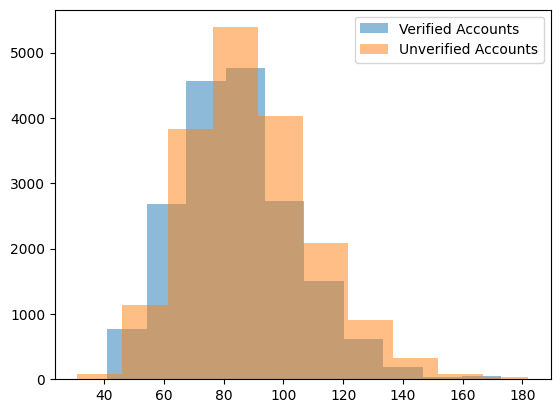

In [24]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot

verified = balanced_data[balanced_data["verified_status"] == "verified"]["transcription_length"]
unverified = balanced_data[balanced_data["verified_status"] == "not verified"]["transcription_length"]

plt.hist(verified, alpha=0.5, label='Verified Accounts')
plt.hist(unverified, alpha=0.5, label='Unverified Accounts')
plt.legend(loc='upper right')
plt.show()

### **Examine correlations**

In [25]:
# Code a correlation matrix to help determine most correlated variables
numeric_data = balanced_data.select_dtypes(include = ['float64', 'int64']).drop('video_id', axis=1)
corr_matrix = numeric_data.corr()
corr_matrix

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
video_duration_sec,1.000000,0.013892,0.004028,0.001944,0.006930,-0.000080,-0.005043
video_view_count,0.013892,1.000000,0.855342,0.710466,0.691557,0.747564,0.246867
video_like_count,0.004028,0.855342,1.000000,0.832361,0.806370,0.816416,0.217852
video_share_count,0.001944,0.710466,0.832361,1.000000,0.709738,0.671601,0.176362
video_download_count,0.006930,0.691557,0.806370,0.709738,1.000000,0.794524,0.175287
video_comment_count,-0.000080,0.747564,0.816416,0.671601,0.794524,1.000000,0.217179
transcription_length,-0.005043,0.246867,0.217852,0.176362,0.175287,0.217179,1.000000


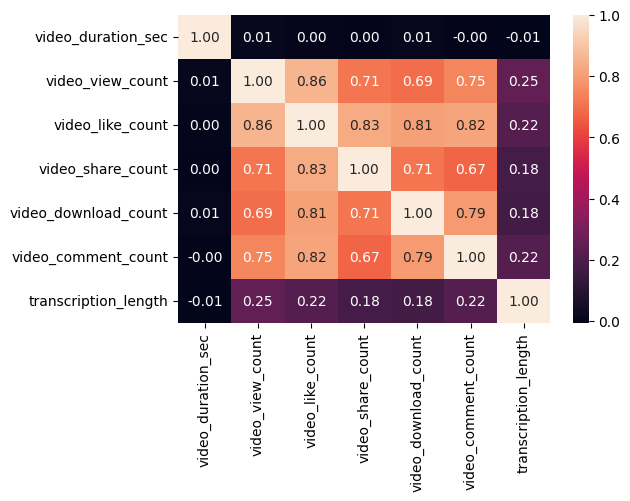

In [26]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. 

From the heatmap (or correlation matrix), we can spot strong correlations (close to 1.0) between some features. These are red flags for multicollinearity, which violates logistic regression assumptions.

**Variables that are strongly correlated:**

- video_view_count, video_like_count, video_share_count, video_download_count, and video_comment_count are highly correlated with each other (many correlations > 0.8).

- video_duration_sec and transcription_length are not highly correlated with the others.



## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. 

### **Select variables**

In [27]:
# Select outcome variable
y = balanced_data['verified_status']

Select the features.

In [28]:
# Select features

selected_features = [
    'video_view_count',
    'video_duration_sec',
    'transcription_length',
    'claim_status', 
    'author_ban_status',
    
]

# Display first few rows of features dataframe
X = balanced_data[selected_features]
X.head()

,video_view_count,video_duration_sec,transcription_length,claim_status,author_ban_status
0,343296.0,59,97,claim,under review
1,140877.0,32,107,claim,active
2,902185.0,31,137,claim,active
3,437506.0,25,131,claim,active
4,56167.0,19,128,claim,active


### **Train-test split**

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Confirm that the dimensions of the training and testing sets are in alignment.

In [30]:
# Get shape of each training and testing set
print(f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"X_test has {X_test.shape[0]} rows and {X_test.shape[1]} columns")

X_train has 25037 rows and 5 columns
X_test has 10731 rows and 5 columns


### **Encode variables**

Check the data types of the features.

In [31]:
# Check data types
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25037 entries, 33627 to 15795
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   video_view_count      25037 non-null  float64
 1   video_duration_sec    25037 non-null  int64  
 2   transcription_length  25037 non-null  int64  
 3   claim_status          25037 non-null  object 
 4   author_ban_status     25037 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ MB


In [32]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()

array(['opinion', 'claim'], dtype=object)

In [33]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()

array(['active', 'banned', 'under review'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [34]:
# Select the training features that needs to be encoded
encoding_features = ['claim_status', 'author_ban_status']

# Display first few rows
X_train[encoding_features].head()

,claim_status,author_ban_status
33627,opinion,active
32177,opinion,active
17038,opinion,active
91,claim,banned
25378,opinion,active


In [35]:
# Set up an encoder for one-hot encoding the categorical features
ohe = OneHotEncoder(drop='first', sparse_output=False)

In [36]:
# Fit and transform the training features using the encoder
X_train_encoded = ohe.fit_transform(X_train[encoding_features])

In [37]:
# Get feature names from encoder
ohe.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [38]:
# Display first few rows of encoded training features
X_train_encoded[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [39]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(X_train_encoded, 
                                columns=['claim_status_opinion', 'author_ban_status_banned', 
                                         'author_ban_status_under_review'])

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under_review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [40]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train = X_train.drop(columns=encoding_features).reset_index(drop=True)
X_train.head()

,video_view_count,video_duration_sec,transcription_length
0,1235.0,58,97
1,5510.0,11,103
2,7496.0,38,96
3,436875.0,37,99
4,955.0,30,59


In [41]:
X_train_final = pd.concat([X_train, X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_view_count,video_duration_sec,transcription_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under_review
0,1235.0,58,97,1.0,0.0,0.0
1,5510.0,11,103,1.0,0.0,0.0
2,7496.0,38,96,1.0,0.0,0.0
3,436875.0,37,99,0.0,1.0,0.0
4,955.0,30,59,1.0,0.0,0.0


In [42]:
# Check data type of outcome variable
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   video_view_count                25037 non-null  float64
 1   video_duration_sec              25037 non-null  int64  
 2   transcription_length            25037 non-null  int64  
 3   claim_status_opinion            25037 non-null  float64
 4   author_ban_status_banned        25037 non-null  float64
 5   author_ban_status_under_review  25037 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.1 MB


In [43]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

In [44]:
# Set up an encoder for one-hot encoding the categorical outcome variable
ohe_label = OneHotEncoder(drop='first', sparse_output=False)

In [45]:
# Encode the training outcome variable
y_train_encoded = ohe_label.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_encoded

array([1., 1., 0., ..., 0., 0., 0.], shape=(25037,))

### **Model building**

Construct a model and fit it to the training set.

In [46]:
# Construct a logistic regression model and fit it to the training set
clf = LogisticRegression(max_iter=1000).fit(X_train_final, y_train_encoded)

## **PACE: Execute**

### **Results and evaluation**

Encode categorical features in the testing set using an appropriate method.

In [47]:
# Select the testing features that needs to be encoded
X_test[encoding_features].head(3)

,claim_status,author_ban_status
26849,opinion,active
1227,claim,under review
25467,opinion,under review


In [48]:
# Transform the testing features using the encoder
X_test_encoded = ohe.fit_transform(X_test[encoding_features])

# Display first few rows of encoded testing features
X_test_encoded[:3]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 1.]])

In [49]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(X_test_encoded, 
                                columns=['claim_status_opinion', 'author_ban_status_banned', 
                                         'author_ban_status_under_review'])

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under_review
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0


In [50]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test = X_test.drop(columns=encoding_features).reset_index(drop=True)
X_test.head(3)

,video_view_count,video_duration_sec,transcription_length
0,1580.0,14,109
1,862507.0,43,111
2,449.0,52,64


In [51]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
X_test_final = pd.concat([X_test, X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_view_count,video_duration_sec,transcription_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under_review
0,1580.0,14,109,1.0,0.0,0.0
1,862507.0,43,111,0.0,0.0,1.0
2,449.0,52,64,1.0,0.0,1.0
3,4458.0,17,61,1.0,1.0,0.0
4,9877.0,8,84,1.0,1.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [52]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [53]:
# Display the predictions on the encoded testing set
y_pred

array([1., 0., 1., ..., 1., 0., 0.], shape=(10731,))

Display the true labels of the testing set.

In [54]:
# Display the true labels of the testing set
y_test

26849        verified
1227     not verified
25467        verified
27310        verified
27560        verified
             ...     
16758    not verified
28583        verified
23163        verified
1580     not verified
7676     not verified
Name: verified_status, Length: 10731, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [55]:
# Encode the testing outcome variable
y_test_encoded = ohe_label.transform(y_test.values.reshape(-1, 1)).ravel()


# Display the encoded testing outcome variable
y_test_encoded

array([1., 0., 1., ..., 1., 0., 0.], shape=(10731,))

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [56]:
# Get shape of each training and testing set
print(f"y_test has {y_test_encoded.shape[0]} rows.")
print(f"y_pred has {y_pred.shape[0]} rows.")

y_test has 10731 rows.
y_pred has 10731 rows.


### **Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

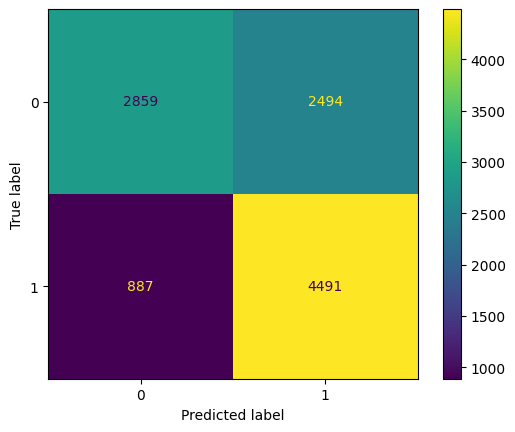

In [57]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

Let's create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [58]:
# Create a classification report
print(f"f1 score: {np.round(f1_score(y_test_encoded, y_pred), 3)}")
print(f"Presision: {np.round(precision_score(y_test_encoded, y_pred), 3)}")
print(f"Recall: {np.round(recall_score(y_test_encoded, y_pred), 3)}")
print(f"Accuracy: {np.round(accuracy_score(y_test_encoded, y_pred), 3)}")

f1 score: 0.727
Presision: 0.643
Recall: 0.835
Accuracy: 0.685


### **Interpret model coefficients**

In [59]:
# Get feature names (assuming X_train_final is a DataFrame)
feature_names = X_train_final.columns

# Get model coefficients (flattened if necessary)
coefficients = clf.coef_[0]

# Create a DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Log-Odds Ratio': coefficients
})

# Sort by absolute value of coefficients (optional, for better readability)
coef_df = coef_df.reindex(coef_df['Log-Odds Ratio'].abs().sort_values(ascending=False).index)
coef_df.head()

,Feature,Log-Odds Ratio
3,claim_status_opinion,1.475064
4,author_ban_status_banned,-0.433187
5,author_ban_status_under_review,-0.370308
2,transcription_length,-0.001922
1,video_duration_sec,-0.001738


### **Conclusion**

**Key Takeaways:**

1. Strong Recall, Moderate Precision:

    - Recall = 0.835 → The model correctly identifies most of the positive cases.
    
    - Precision = 0.643 → A significant number of false positives are present.

2. Balanced Performance:

    - F1 Score = 0.727 → Shows a decent balance between precision and recall.
    
    - Accuracy = 0.685 → The model performs moderately well overall.

3. Feature Impact (Logistic Regression Coefficients):

    - *transcription_length* and *video_duration_sec* are the most influential predictors (positive impact).
    
    - *claim_status_opinion* has minimal effect.
    
    - *video_view_count* and *author_ban_status_banned* contribute almost nothing (near-zero influence).

4. Room for Improvement:

   High false positives (seen in confusion matrix: 2965) suggest model may benefit from:

    - Additional features

    - Feature engineering

    - Or a more complex model.


- The model achieves 83.5% recall, meaning it successfully identifies the majority of the true positive cases. This is valuable when missing a positive case is costly (e.g., misinformation or harmful content).

- While the accuracy is 68.5%, the high F1 score of 72.7% shows a good balance between precision and recall, making the model reliable for real-world use.

- The feature transcription_length has the strongest positive influence on the prediction outcome, suggesting that longer transcripts are more likely associated with the target label.

- Features like video_view_count and author_ban_status_banned had little to no influence, which may indicate they can be deprioritized or removed to simplify the model.